In [1]:
from conphar.Pharmacophores import parse_json_pharmacophore, show_pharmacophoric_descriptors, save_pharmacophore_to_pymol, save_pharmacophore_to_json, compute_concensus_pharmacophore, get_ligand_receptor_pharmacophore
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.environ["LC_ALL"] = "C"
os.environ["LANG"] = "C"

ConPhar tools imported successfully


Next cell only works on Linux machines

In [ ]:
receptor_path = "../Data/target/AF-Q13705-ACVR2B_-_prepared.pdb"  # update with your actual receptor file

for file in os.listdir("../Data/other/SDF poses/"):
    if file.endswith(".sdf"):
        ligand_path = f"../Data/other/SDF poses/{file}"
        output_name = os.path.splitext(file)[0]
        out_path = f"../Results/pharmacophores/{output_name}"
        get_ligand_receptor_pharmacophore(receptor=receptor_path, ligand=ligand_path, out=out_path)

From here it works on all machines

In [2]:
cluster = 'cluster_1'

p4_table=pd.DataFrame()
for file in os.listdir(f'../Results/pharmacophores/{cluster}'):
    if '.json' in file:
        try:
            p4,lig,rec=parse_json_pharmacophore(f"../Results/pharmacophores/{cluster}/{file}")
            p4['ligand']=file.replace('.json','')
            p4_table=pd.concat([p4_table,p4],ignore_index=True)
        except Exception:
            pass

In [3]:
# rename colors
p4_table['color'] = p4_table['color'].replace({
    'navy': 'blue',
    'white': 'yellow',
})
p4_table = p4_table[~p4_table['name'].isin(['NegativeIon', 'PositiveIon'])]
p4_table

,enabled,name,radius,size,svector,vector,x,y,z,color,ligand
0,True,Aromatic,1.1,6,"{'x': 0.8370344019368281, 'y': -0.513799962652...","[{'x': 0.8370344019368281, 'y': -0.51379996265...",-0.888167,5.274667,-8.530000,purple,CUIH_-9.462
1,True,Aromatic,1.1,6,"{'x': -0.06577936815703536, 'y': -0.6122213380...","[{'x': -0.06577936815703536, 'y': -0.612221338...",-6.071000,0.290167,-12.609000,purple,CUIH_-9.462
2,True,Aromatic,1.1,5,"{'x': -0.0685429356096098, 'y': -0.61185634264...","[{'x': -0.0685429356096098, 'y': -0.6118563426...",-7.856800,1.306000,-11.971200,purple,CUIH_-9.462
3,True,HydrogenDonor,0.5,1,"{'x': -0.9138877261592397, 'y': -0.08918316740...","[{'x': -0.9138877261592397, 'y': -0.0891831674...",-2.392000,2.958000,-8.976000,yellow,CUIH_-9.462
4,True,HydrogenDonor,0.5,1,"{'x': 0.1227827755932122, 'y': -0.698917337992...","[{'x': 0.1227827755932122, 'y': -0.69891733799...",1.179000,4.782000,-5.007000,yellow,CUIH_-9.462
5,True,HydrogenAcceptor,0.5,1,"{'x': 0.6039800370811819, 'y': 0.3505993117657...","[{'x': 0.603980037081182, 'y': 0.3505993117657...",-0.710000,1.365000,-9.644000,orange,CUIH_-9.462
6,True,HydrogenAcceptor,0.5,1,"{'x': 0.2713862153877971, 'y': 0.7483075791942...","[{'x': 0.271386215387797, 'y': 0.7483075791942...",-7.540000,2.140000,-11.296000,orange,CUIH_-9.462
7,True,HydrogenAcceptor,0.5,1,"{'x': 0.1227827755932122, 'y': -0.698917337992...","[{'x': 0.1227827755932122, 'y': -0.69891733799...",1.179000,4.782000,-5.007000,orange,CUIH_-9.462
8,True,HydrogenAcceptor,0.5,1,"{'x': 0.5809683964340242, 'y': 0.8096544773966...","[{'x': 0.5809683964340243, 'y': 0.809654477396...",1.099000,7.265000,-5.822000,orange,CUIH_-9.462
9,True,HydrogenAcceptor,0.5,1,"{'x': -0.7437071414943055, 'y': 0.250330631776...","[{'x': -0.7437071414943054, 'y': 0.25033063177...",-0.903000,6.418000,-4.760000,orange,CUIH_-9.462


In [4]:
# print sum of "Aromatic" in name column of p4_table
p4_table['name'].value_counts()

name
Hydrophobic         24
HydrogenAcceptor    17
Aromatic            10
HydrogenDonor        8
Name: count, dtype: int64

In [5]:
os.makedirs(f'../Results/pharmacophores/{cluster}/consensus', exist_ok=True)
save_pharmacophore_to_pymol(p4_table,out_file=f'../Results/pharmacophores/{cluster}/consensus/all_features_{cluster}.pse')
save_pharmacophore_to_json(p4_table,out_file=f'../Results/pharmacophores/{cluster}/consensus/all_features_{cluster}.json')

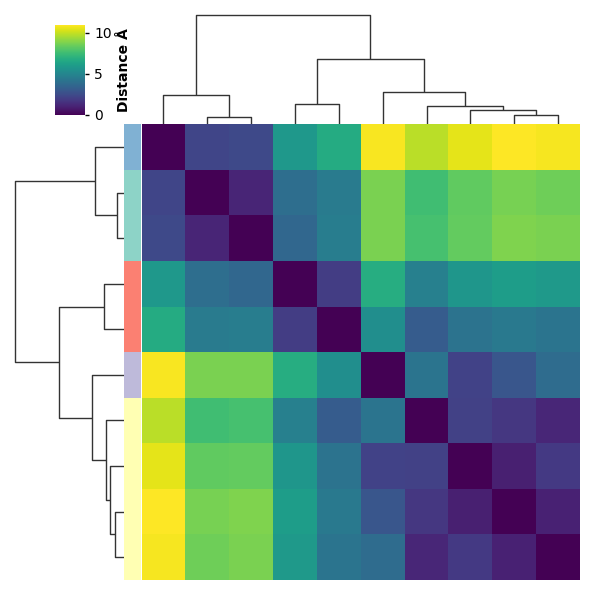

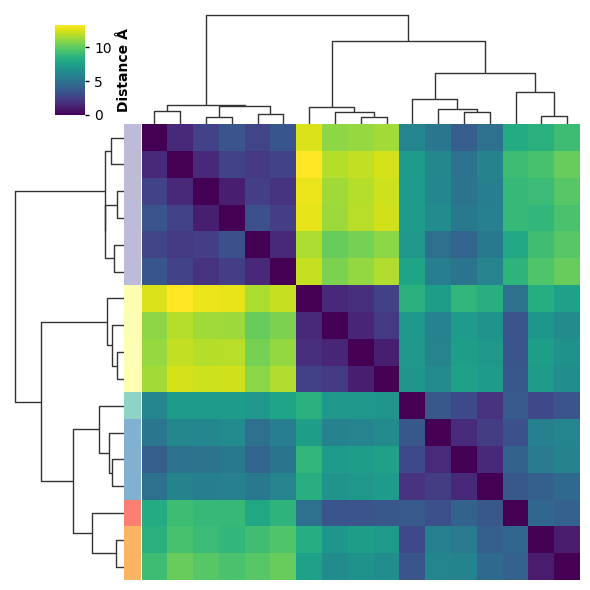

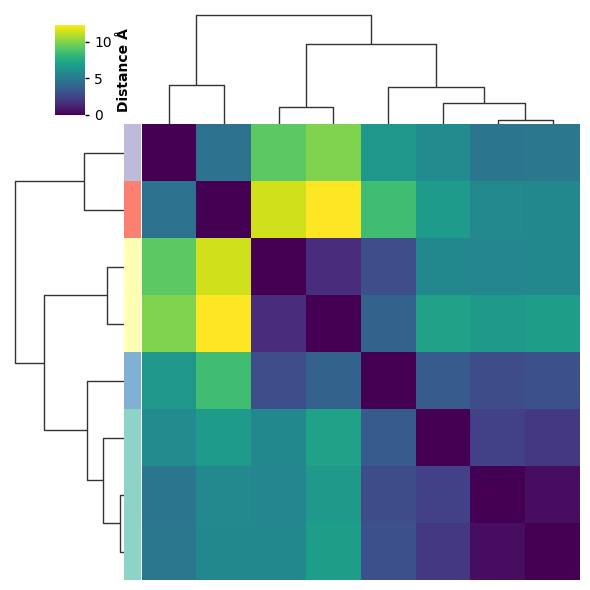

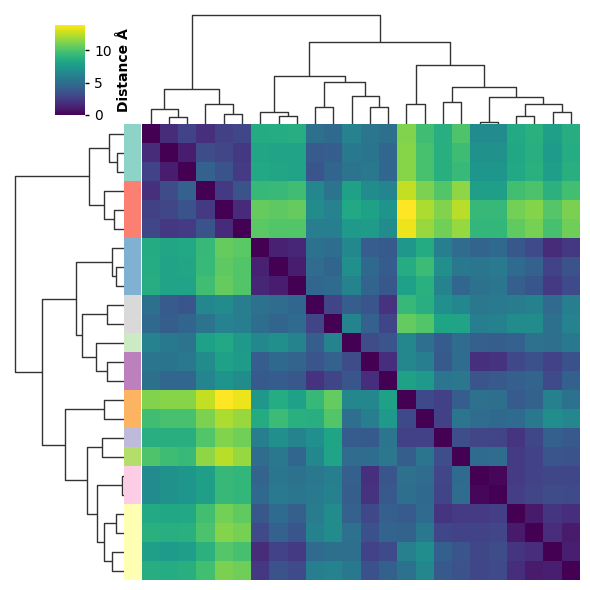

In [6]:
concensus,links=compute_concensus_pharmacophore(p4_table,save_data_per_descriptor=True,out_folder=f'../Results/pharmacophores/{cluster}/consensus',cmap_plots="viridis", h_dist=0.2)

In [7]:
concensus['cluster'] = concensus['cluster'].astype(int)
concensus

,name,cluster,x,y,z,radius,color,weight,balance
1,Aromatic,1,-0.970000,4.963750,-8.062333,0.500000,purple,2.0,0.222222
2,Aromatic,2,0.298500,6.576333,-7.124000,0.500000,purple,1.0,0.055556
3,Aromatic,3,-2.104017,1.645900,-10.040433,0.500000,purple,2.0,0.111111
4,Aromatic,4,-5.172583,0.009233,-13.313450,0.601334,purple,4.0,0.555556
5,Aromatic,5,-7.856800,1.306000,-11.971200,0.500000,purple,1.0,0.055556
6,HydrogenAcceptor,1,0.697250,6.932375,-5.617125,1.143290,orange,6.0,0.320000
7,HydrogenAcceptor,2,-7.751875,1.086375,-10.990250,0.762400,orange,4.0,0.320000
8,HydrogenAcceptor,3,-1.901333,3.148667,-7.999667,0.614998,orange,3.0,0.120000
9,HydrogenAcceptor,4,-0.710000,1.365000,-9.644000,0.500000,orange,1.0,0.040000
10,HydrogenAcceptor,5,-1.043500,1.295500,-12.794500,0.500000,orange,2.0,0.160000


In [8]:
#remove all rows where weight < 2
concensus_test = concensus[concensus['weight'] >= 2]
len(concensus_test)

17

In [9]:
save_pharmacophore_to_pymol(concensus,out_file=f'../Results/pharmacophores/{cluster}/consensus/{cluster}_concensus.pse',
select='concensus')
save_pharmacophore_to_json(concensus,out_file=f'../Results/pharmacophores/{cluster}/consensus/{cluster}_concensus.json')

manually make Weight dependant coloring

In [10]:
# find max weight value for each name
max_weight = concensus.groupby('name')['weight'].max()
print(max_weight)

weighting_list = concensus
# add column frequency to concensus where weight / max_weight
weighting_list['frequency'] = weighting_list['weight'] / max_weight[weighting_list['name']].values

# Normalize the frequency to range from 0 to 1
min_freq = weighting_list['frequency'].min()
max_freq = weighting_list['frequency'].max()
weighting_list['normalized_frequency'] = (weighting_list['frequency'] - min_freq) / (max_freq - min_freq)
weighting_list

name
Aromatic            4.0
HydrogenAcceptor    6.0
HydrogenDonor       3.0
Hydrophobic         4.0
Name: weight, dtype: float64


,name,cluster,x,y,z,radius,color,weight,balance,frequency,normalized_frequency
1,Aromatic,1,-0.970000,4.963750,-8.062333,0.500000,purple,2.0,0.222222,0.500000,0.4
2,Aromatic,2,0.298500,6.576333,-7.124000,0.500000,purple,1.0,0.055556,0.250000,0.1
3,Aromatic,3,-2.104017,1.645900,-10.040433,0.500000,purple,2.0,0.111111,0.500000,0.4
4,Aromatic,4,-5.172583,0.009233,-13.313450,0.601334,purple,4.0,0.555556,1.000000,1.0
5,Aromatic,5,-7.856800,1.306000,-11.971200,0.500000,purple,1.0,0.055556,0.250000,0.1
6,HydrogenAcceptor,1,0.697250,6.932375,-5.617125,1.143290,orange,6.0,0.320000,1.000000,1.0
7,HydrogenAcceptor,2,-7.751875,1.086375,-10.990250,0.762400,orange,4.0,0.320000,0.666667,0.6
8,HydrogenAcceptor,3,-1.901333,3.148667,-7.999667,0.614998,orange,3.0,0.120000,0.500000,0.4
9,HydrogenAcceptor,4,-0.710000,1.365000,-9.644000,0.500000,orange,1.0,0.040000,0.166667,0.0
10,HydrogenAcceptor,5,-1.043500,1.295500,-12.794500,0.500000,orange,2.0,0.160000,0.333333,0.2


In [11]:
# print the top 4 best clusters based on normalized_frequency for each name
top_indices = weighting_list.groupby('name')['normalized_frequency'].nlargest(4).reset_index(level=0, drop=True).index
top_clusters = weighting_list.loc[top_indices]
top_clusters = top_clusters.sort_values(by='name')
top_clusters

,name,cluster,x,y,z,radius,color,weight,balance,frequency,normalized_frequency
4,Aromatic,4,-5.172583,0.009233,-13.313450,0.601334,purple,4.0,0.555556,1.000000,1.0
1,Aromatic,1,-0.970000,4.963750,-8.062333,0.500000,purple,2.0,0.222222,0.500000,0.4
3,Aromatic,3,-2.104017,1.645900,-10.040433,0.500000,purple,2.0,0.111111,0.500000,0.4
2,Aromatic,2,0.298500,6.576333,-7.124000,0.500000,purple,1.0,0.055556,0.250000,0.1
6,HydrogenAcceptor,1,0.697250,6.932375,-5.617125,1.143290,orange,6.0,0.320000,1.000000,1.0
7,HydrogenAcceptor,2,-7.751875,1.086375,-10.990250,0.762400,orange,4.0,0.320000,0.666667,0.6
8,HydrogenAcceptor,3,-1.901333,3.148667,-7.999667,0.614998,orange,3.0,0.120000,0.500000,0.4
10,HydrogenAcceptor,5,-1.043500,1.295500,-12.794500,0.500000,orange,2.0,0.160000,0.333333,0.2
15,HydrogenDonor,4,-2.201200,2.398200,-8.844800,0.865963,yellow,3.0,0.500000,1.000000,1.0
14,HydrogenDonor,3,1.268500,5.537500,-4.834500,0.500000,yellow,2.0,0.200000,0.666667,0.6


In [12]:
# remove frequecy and normalized_frequency columns
concensus = concensus.drop(columns=['frequency', 'normalized_frequency'])
concensus

,name,cluster,x,y,z,radius,color,weight,balance
1,Aromatic,1,-0.970000,4.963750,-8.062333,0.500000,purple,2.0,0.222222
2,Aromatic,2,0.298500,6.576333,-7.124000,0.500000,purple,1.0,0.055556
3,Aromatic,3,-2.104017,1.645900,-10.040433,0.500000,purple,2.0,0.111111
4,Aromatic,4,-5.172583,0.009233,-13.313450,0.601334,purple,4.0,0.555556
5,Aromatic,5,-7.856800,1.306000,-11.971200,0.500000,purple,1.0,0.055556
6,HydrogenAcceptor,1,0.697250,6.932375,-5.617125,1.143290,orange,6.0,0.320000
7,HydrogenAcceptor,2,-7.751875,1.086375,-10.990250,0.762400,orange,4.0,0.320000
8,HydrogenAcceptor,3,-1.901333,3.148667,-7.999667,0.614998,orange,3.0,0.120000
9,HydrogenAcceptor,4,-0.710000,1.365000,-9.644000,0.500000,orange,1.0,0.040000
10,HydrogenAcceptor,5,-1.043500,1.295500,-12.794500,0.500000,orange,2.0,0.160000


In [ ]:
# Define filters as a dictionary: feature name → list of clusters
filters = {
    'Aromatic': [1,12], #purple
    'Hydrophobic': [10], #green
    'HydrogenAcceptor': [9,6], #orange
    'HydrogenDonor': [2] #yellow
}

# Build a set of valid (name, cluster) pairs
valid_pairs = set()
for name, clusters in filters.items():
    for cluster in clusters:
        valid_pairs.add((name, cluster))

# Filter rows matching any of the (name, cluster) pairs
submodel_df = concensus[[ (row['name'], row['cluster']) in valid_pairs for _, row in concensus.iterrows() ]]

save_pharmacophore_to_json(submodel_df,out_file=f'../Results/pharmacophores/{cluster}/consensus/{cluster}/Submodel_4.json')

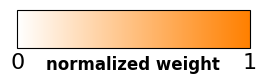

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(3, 1))
fig.subplots_adjust(bottom=0.5)

# Create a colormap from white to purple using RGB values
cmap = mpl.colors.LinearSegmentedColormap.from_list('white_blue', ['white', (1, 0.5, 0)])

# Create a colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal')

# Set the ticks to only 0 and 100
cb1.set_ticks([0,1])

# Remove other ticks and labels
cb1.ax.tick_params(axis='x', which='both', length=0, labelsize=16)  # Enlarge and bold tick numbers

# Enlarge and bold the label
cb1.set_label('normalized weight', fontsize=12, fontweight='bold',labelpad=-12)

# Remove background color
cb1.ax.set_facecolor('none')

# Save the figure to a PNG file
plt.savefig('../Results/images/color keys/color_key_orange.png', transparent=True, bbox_inches='tight', pad_inches=0.1)

plt.show()


In [13]:
from pymol import cmd
import pandas as pd

# Define subsets of the consensus DataFrame
subsets = {
    "Aromatic": weighting_list[weighting_list['name'] == 'Aromatic'],
    "Hydrophobic": weighting_list[weighting_list['name'] == 'Hydrophobic'],
    "HydrogenAcceptor": weighting_list[weighting_list['name'] == 'HydrogenAcceptor'],
    "HydrogenDonor": weighting_list[weighting_list['name'] == 'HydrogenDonor'],
    "PositiveIon": weighting_list[weighting_list['name'] == 'PositiveIon'],
    "NegativeIon": weighting_list[weighting_list['name'] == 'NegativeIon']
}

# Iterate over each subset
for subset_name, subset_data in subsets.items():
    cmd.reinitialize()  # Reset PyMOL session

    # Add pseudoatoms for the current subset
    for index, row in subset_data.iterrows():
        name = row['cluster']
        x, y, z = row['x'], row['y'], row['z']
        radius = row['radius']
        b = row['normalized_frequency']
        color = row['color']
        atom_name = f"{name}_{index}"
        cmd.pseudoatom(object=atom_name, pos=[x, y, z], vdw=radius, b=b)
        cmd.label(atom_name, f'"{name}"')

    # Apply coloring based on B-factor
    cmd.spectrum("b", palette=f"white {color}", selection="*")

    # Group everything and save the PyMOL session
    cmd.group(subset_name, '*')
    cmd.center('all')
    cmd.show('spheres')
    cmd.save(f'../Results/pharmacophores/{cluster}/consensus/{subset_name}_clusters_by_weight.pse')

ExecutiveCenter-Warning: selection doesn't specify any coordinates.
ExecutiveCenter-Warning: selection doesn't specify any coordinates.
